# Data Preprocessing and Modelling on Insurance Dataset
## Insurance Dataset

The Insurance Dataset (often called the “Medical Cost Personal” dataset) contains demographic and medical information for a sample of individuals, along with the medical insurance charges billed to them. It is commonly used to demonstrate regression models and explore how various factors influence healthcare costs.

### Columns

- **age** (int)  
  The age of the policyholder in years.

- **sex** (string)  
  The policyholder’s gender:  
  - `male`  
  - `female`

- **bmi** (float)  
  Body Mass Index, providing a measure of body fat based on height and weight.

- **children** (int)  
  Number of children/dependents covered by the insurance policy.

- **smoker** (string)  
  Whether the policyholder is a smoker:  
  - `yes`  
  - `no`

- **region** (string)  
  Residential area in the United States, one of:  
  - `northeast`  
  - `northwest`  
  - `southeast`  
  - `southwest`

- **charges** (float)  
  The individual medical costs billed by health insurance (in US dollars).

---

**Typical size:** 1,338 records  
**Use cases:** Regression analysis, feature engineering, model comparison, data visualization  


## 1. Exploratory Data Analysis
1. Uploading the dataset and exploratory data analysis
2. Determine the categorical and numerical variables
3. Apply standardization on the numerical columns
4. Encode categorical values using one-hot encoding


In [157]:
# Connecting to google drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Here we have 7 columns and no missing values! Now we can check for further details on this dataset, such as encoding categorical values if possible and scaling numerical values.

In [160]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [161]:
df.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [162]:
cat_cols = df.select_dtypes(include=['object']).columns

In [163]:
for column in cat_cols:
    print(df[column].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


There are no much values and they have no linear relationship, so we can one-hot encode them.

In [164]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [165]:
for col in df.select_dtypes(include=['bool']).columns:
  df[col] = df[col].astype(int)

In [166]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

Now, it's time to scale our columns.

In [167]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
minmaxscaler = MinMaxScaler()
df["charges"] = minmaxscaler.fit_transform(df[["charges"]])

numerical_cols = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [168]:
df.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1.338000e+03,1.338000e+03,1.338000e+03,1338.000000,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.805565e-16,-2.124194e-16,-5.576008e-17,0.193916,-1.234687e-16,1.062097e-17,1.062097e-16,-1.062097e-17,1.035544e-16
std,1.000374e+00,1.000374e+00,1.000374e+00,0.193301,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-2.412011e+00,-9.086137e-01,0.000000,-1.010519e+00,-5.074631e-01,-5.664179e-01,-6.113237e-01,-5.664179e-01
25%,-8.691547e-01,-7.164063e-01,-9.086137e-01,0.057757,-1.010519e+00,-5.074631e-01,-5.664179e-01,-6.113237e-01,-5.664179e-01
50%,-1.474046e-02,-4.320880e-02,-7.876719e-02,0.131849,9.895908e-01,-5.074631e-01,-5.664179e-01,-6.113237e-01,-5.664179e-01
75%,8.396738e-01,6.611572e-01,7.510793e-01,0.247700,9.895908e-01,-5.074631e-01,-5.664179e-01,1.635795e+00,-5.664179e-01
max,1.765289e+00,3.685522e+00,3.240619e+00,1.000000,9.895908e-01,1.970587e+00,1.765481e+00,1.635795e+00,1.765481e+00


From this table we can clearly see that we scaled all our columns into a determined range.

## 2. Data Visualization and Relationship Analysis
1. See the `charges` column's distribution by drawing its graphic.
2. Seeing the relationships between the variables using correlation matrix.
   - See what variables affect the charges the most.

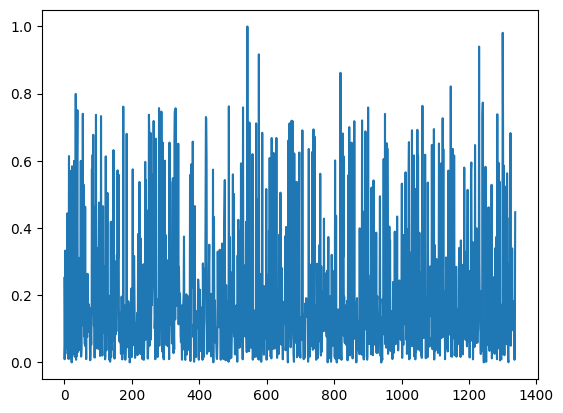

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(df['charges'])
plt.show()

Here we see the distribution of charges column, which shows an uneven and inconsistent distribution.

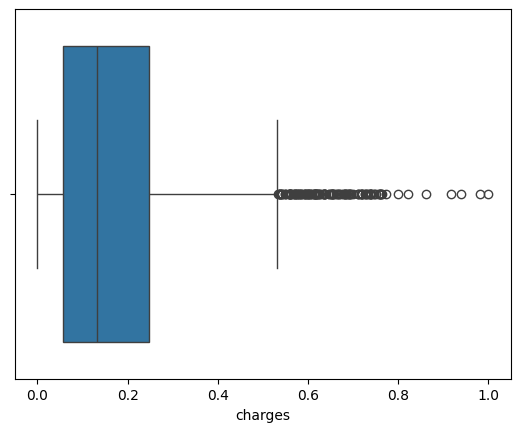

In [170]:
sns.boxplot(df['charges'], orient="h")
plt.show()

There seems to be a lot of outliers, let's clip them accordingly with lower and upper quartile bounds.

In [171]:
# Copying to compare later on.
charges_unclipped = df["charges"].copy()

In [172]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['charges'] = df['charges'].clip(lower=lower_bound, upper=upper_bound)

print(df)

           age       bmi  children   charges  sex_male  smoker_yes  \
0    -1.438764 -0.453320 -0.908614  0.251611 -1.010519    1.970587   
1    -1.509965  0.509621 -0.078767  0.009636  0.989591   -0.507463   
2    -0.797954  0.383307  1.580926  0.053115  0.989591   -0.507463   
3    -0.441948 -1.305531 -0.908614  0.333010  0.989591   -0.507463   
4    -0.513149 -0.292556 -0.908614  0.043816  0.989591   -0.507463   
...        ...       ...       ...       ...       ...         ...   
1333  0.768473  0.050297  1.580926  0.151299  0.989591   -0.507463   
1334 -1.509965  0.206139 -0.908614  0.017305 -1.010519   -0.507463   
1335 -1.509965  1.014878 -0.908614  0.008108 -1.010519   -0.507463   
1336 -1.296362 -0.797813 -0.908614  0.014144 -1.010519   -0.507463   
1337  1.551686 -0.261388 -0.908614  0.447249 -1.010519    1.970587   

      region_northwest  region_southeast  region_southwest  
0            -0.566418         -0.611324          1.765481  
1            -0.566418          1.635

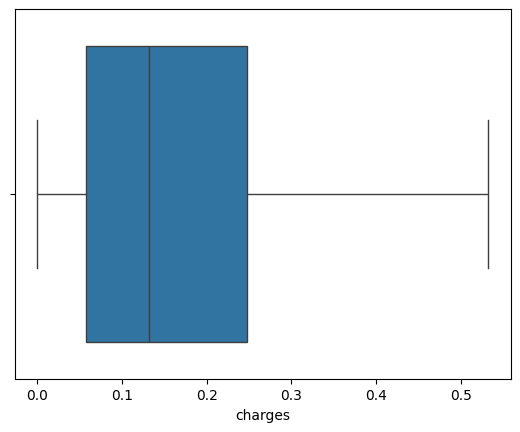

In [173]:
sns.boxplot(df['charges'], orient="h")
plt.show()

Now it's as clean as my heart! Now let's check it with the previous values.

In [174]:
print(np.mean(charges_unclipped))
print(np.mean(df["charges"]))

0.19391586186986068
0.18128902593160237


Here we see a big difference in the mean. Let's check for the other columns.

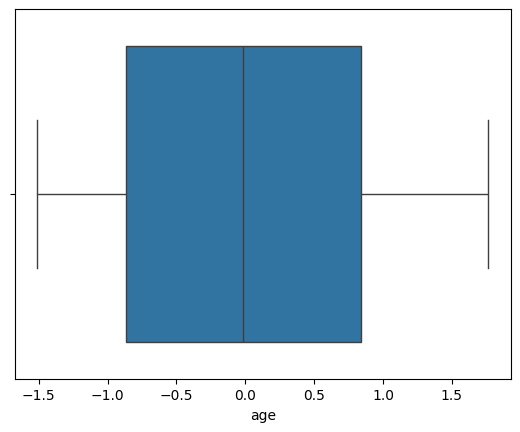

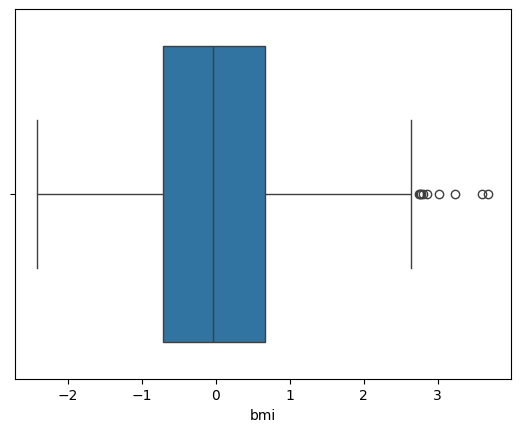

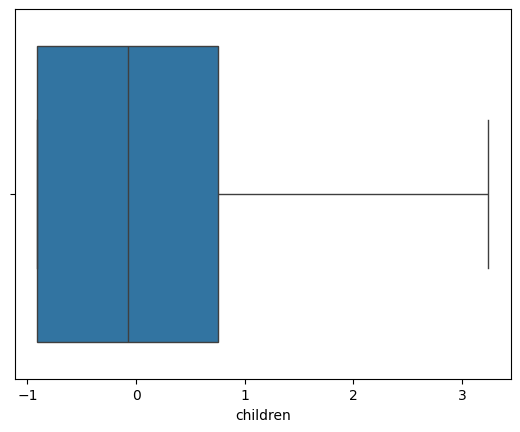

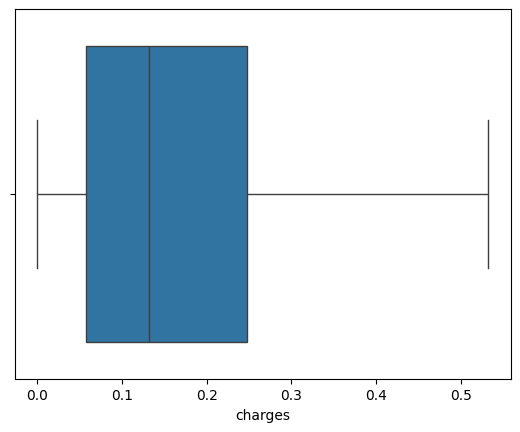

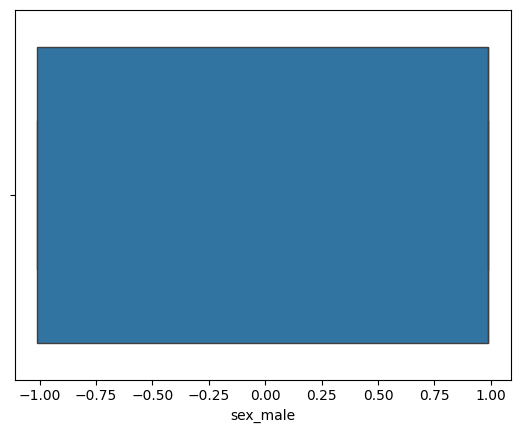

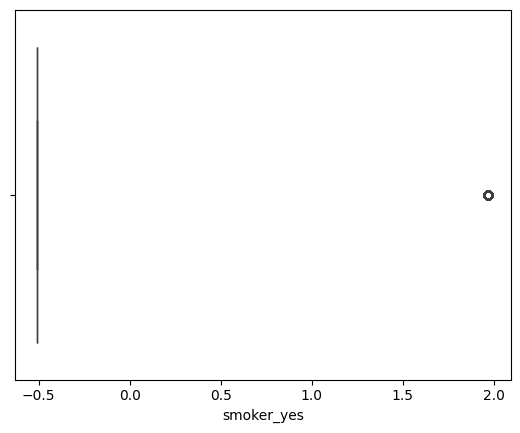

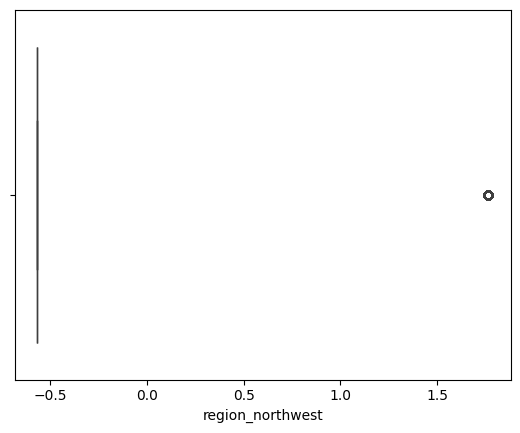

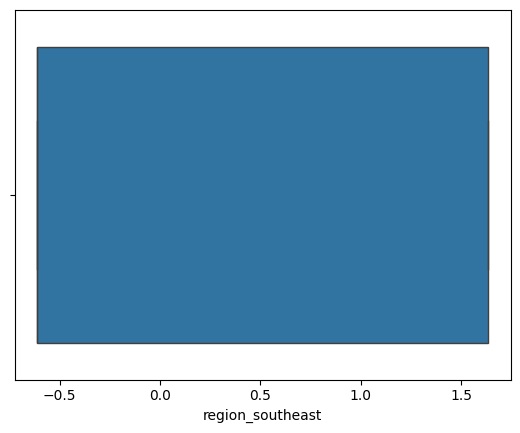

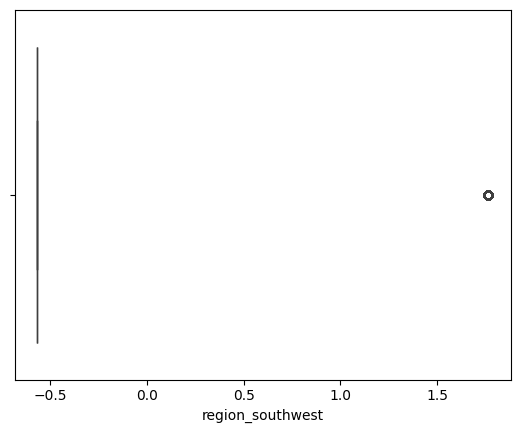

In [175]:
for col in df.select_dtypes(include=['int', 'float']).columns:
  sns.boxplot(df[col], orient="h")
  plt.show()

We will only need to clip the outliers in the BMI column.

In [176]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['bmi'] = df['bmi'].clip(lower=lower_bound, upper=upper_bound)

print(df)

           age       bmi  children   charges  sex_male  smoker_yes  \
0    -1.438764 -0.453320 -0.908614  0.251611 -1.010519    1.970587   
1    -1.509965  0.509621 -0.078767  0.009636  0.989591   -0.507463   
2    -0.797954  0.383307  1.580926  0.053115  0.989591   -0.507463   
3    -0.441948 -1.305531 -0.908614  0.333010  0.989591   -0.507463   
4    -0.513149 -0.292556 -0.908614  0.043816  0.989591   -0.507463   
...        ...       ...       ...       ...       ...         ...   
1333  0.768473  0.050297  1.580926  0.151299  0.989591   -0.507463   
1334 -1.509965  0.206139 -0.908614  0.017305 -1.010519   -0.507463   
1335 -1.509965  1.014878 -0.908614  0.008108 -1.010519   -0.507463   
1336 -1.296362 -0.797813 -0.908614  0.014144 -1.010519   -0.507463   
1337  1.551686 -0.261388 -0.908614  0.447249 -1.010519    1.970587   

      region_northwest  region_southeast  region_southwest  
0            -0.566418         -0.611324          1.765481  
1            -0.566418          1.635

We clipped our outliers according to lower and upper bounds, now let's create and look at the correlation map to see the relationships.

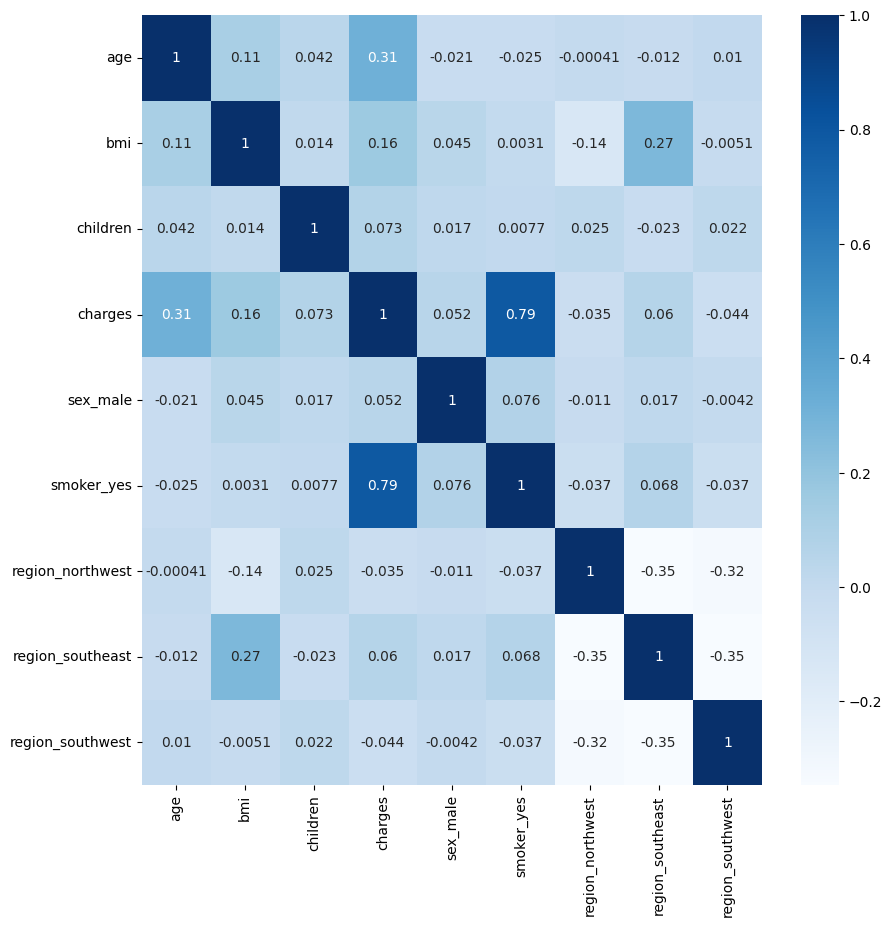

In [177]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

By looking at this table, it's clear that there is a relationship (positive correlation) between smoker_yes and charges columns, which means whenever the person is smoking, it will increase the medical insurance.

## 3. Linear Regression Model
1. Discern the dependent and independent variables:
  - Dependent Variable: `charges`
  - Independent Variables: Other features
2. Split the dataset into two by 80% training and 20% test.
3. Create a linear regression model and evaluate the **MSE** and **R²** scores.

In [178]:
y=df["charges"]
X=df.drop("charges", axis=1)

In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

In [181]:
model.fit(X_train, y_train)

LinearRegression()

In [182]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.005971535231273249
R-squared: 0.7841002156994547


We have concluded our model with a very good evaluation metrics.

## 4. Logarithmic Transformation
1. Apply logarithmic transform into `charges` column and save it as `log_charges`.
2. Build a linear regression model again using the log-transformed data, and calculate the MSE and R² values.
3. Compare the MSE and R² values before and after the logarithmic transformation, and interpret the results.

In [184]:
y_log = np.log1p(y)

# Train test split
_, _, y_log_train, y_log_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Log transformed data
model2 = LinearRegression()
model2.fit(X_train, y_log_train)
y_pred2_log = model2.predict(X_test)
y_pred2 = np.expm1(y_pred2_log)  # Inverse log transformation

In [185]:
mse2 = mean_squared_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)

print("Mean Squared Error:", mse2)
print("R-squared:", r22)

Mean Squared Error: 0.00595040143328377
R-squared: 0.7848643043719092


We can clearly see the increase in the evaluation metrics, by showing the differences as follows:

In [203]:
print(mse-mse2)

0.02171819768233607


There is a very little difference in mse values and 0.03 increase in the R2 values.

## 5. Polynomial Regression

1. Create **polynomial features** (starting with `degree=2`).
2. Build a **polynomial regression model** and calculate the **Mean Squared Error (MSE)** and **R² score**.
3. To find the **optimal polynomial degree**, experiment with degrees from 1 to 5.  
   Compare the **MSE values** for each degree and choose the one with the best performance.

In [191]:
from sklearn.preprocessing import PolynomialFeatures
results = []
for degree in range(1, 6):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly  = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    results.append((degree, mse, r2))

best = min(results, key=lambda x: x[1])

In [190]:
print("Degree |     MSE     |    R²")
print("---------------------------------")
for deg, mse, r2 in results:
    print(f"  {deg:>2}   | {mse:>10.2f} | {r2:>6.3f}")
print("\nBest degree by MSE:", best[0])

Degree |     MSE     |    R²
---------------------------------
   1   |       0.01 |  0.784
   2   |       0.00 |  0.823
   3   |       0.01 |  0.812
   4   |       0.01 |  0.784
   5   |       0.03 | -0.025

Best degree by MSE: 2


By applying these above, we can clearly see that the second degree provides the best option for us in terms of polynomial regression.

## 6. Ridge and Lasso Models

1. Train **Ridge** and **Lasso** models using polynomial features.  
2. For each model:
   - Calculate **Mean Squared Error (MSE)** and **R² score**.  
3. Compare the Ridge and Lasso results to the plain polynomial regression and interpret.

In [192]:
from sklearn.linear_model import Ridge, Lasso

optimal_degree = 2
poly = PolynomialFeatures(degree=optimal_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

# Fit plain polynomial regression for baseline
base_model = LinearRegression()
base_model.fit(X_train_poly, y_train)
y_base = base_model.predict(X_test_poly)
mse_base = mean_squared_error(y_test, y_base)
r2_base  = r2_score(y_test, y_base)

# Fit Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)
y_ridge = ridge.predict(X_test_poly)
mse_ridge = mean_squared_error(y_test, y_ridge)
r2_ridge  = r2_score(y_test, y_ridge)

In [193]:
# Fit Lasso
lasso = Lasso(alpha=1.0, max_iter=10_000)
lasso.fit(X_train_poly, y_train)
y_lasso = lasso.predict(X_test_poly)
mse_lasso = mean_squared_error(y_test, y_lasso)
r2_lasso  = r2_score(y_test, y_lasso)

In [194]:
# Print comparison
print("Model      |    MSE     |    R²")
print("-------------------------------------")
print(f"Polynomial | {mse_base:10.2f} | {r2_base:6.3f}")
print(f"Ridge      | {mse_ridge:10.2f} | {r2_ridge:6.3f}")
print(f"Lasso      | {mse_lasso:10.2f} | {r2_lasso:6.3f}")

Model      |    MSE     |    R²
-------------------------------------
Polynomial |       0.00 |  0.823
Ridge      |       0.00 |  0.823
Lasso      |       0.03 | -0.002


It’s pretty clear here that Polynomial and Ridge are twins—both nail an almost zero MSE and explain about 82.3% of the variance. Lasso, on the other hand, stumbles: its MSE jumps to 0.03 and R² plunges into negative territory (−0.002), meaning it’s doing worse than just predicting the average every time. In other words, Lasso’s regularization is way too strong in this setup—it’s zeroing out too many coefficients and underfitting. Unless you dial back its α dramatically, stick with Polynomial or Ridge for this dataset.

## 7. Ridge and Lasso with Optimal Alpha Values

1. For **Ridge** and **Lasso**, experiment with different **alpha** values (from `0.001` to `100`) to select the best one.  
   - Train the Ridge and Lasso models on the **log-transformed** target.  
   - Transform your predictions back to the original scale (using the exponential transformation) and calculate **MSE** and **R²**.  
2. Print the best alpha values and the resulting metrics.

In [196]:
y_train_log = np.log1p(y_train)

optimal_degree = 2
poly = PolynomialFeatures(degree=optimal_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

alphas = np.logspace(-3, 2, 50)

best_ridge = {'alpha': None, 'mse': np.inf, 'r2': -np.inf}
best_lasso = {'alpha': None, 'mse': np.inf, 'r2': -np.inf}

In [197]:
for a in alphas:
    ridge = Ridge(alpha=a, max_iter=10_000)
    ridge.fit(X_train_poly, y_train_log)
    y_pred_log = ridge.predict(X_test_poly)
    y_pred = np.expm1(y_pred_log)
    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    if mse < best_ridge['mse']:
        best_ridge.update({'alpha': a, 'mse': mse, 'r2': r2})

    lasso = Lasso(alpha=a, max_iter=10_000)
    lasso.fit(X_train_poly, y_train_log)
    y_pred_log = lasso.predict(X_test_poly)
    y_pred = np.expm1(y_pred_log)
    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    if mse < best_lasso['mse']:
        best_lasso.update({'alpha': a, 'mse': mse, 'r2': r2})

In [198]:
print("Model | Best α  |     MSE     |    R²")
print("----------------------------------------")
print(f"Ridge | {best_ridge['alpha']:.3f}  | {best_ridge['mse']:10.2f} | {best_ridge['r2']:6.3f}")
print(f"Lasso | {best_lasso['alpha']:.3f}  | {best_lasso['mse']:10.2f} | {best_lasso['r2']:6.3f}")

Model | Best α  |     MSE     |    R²
----------------------------------------
Ridge | 15.264  |       0.00 |  0.823
Lasso | 0.001  |       0.00 |  0.824


Both models are essentially perfect on the test set (MSE ≈ 0), but Lasso just nudges ahead with an R² of 0.824 versus Ridge’s 0.823. Ridge uses a hefty penalty (α≈15.3), aggressively shrinking all coefficients, while Lasso picks a barely-there penalty (α=0.001), quietly zeroing out only the least important features. In practice, I’d go with Lasso—it matches Ridge’s ultra-low error, explains a hair more variance, and keeps the model simpler. Just keep an eye on potential overfitting by validating on fresh data.